In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
# try load a single data to check it
names = ['name', 'sex', 'count']
test_data = pd.read_csv('./names/yob1880.txt', header=None, names=names, index_col=False)

In [3]:
year = range(1880, 2018)
df = []
for y in year:
    data_name = './names/yob{}.txt'.format(y)
    buffer = pd.read_csv(data_name, header=None, names=names, index_col=False)
    buffer['year'] = y  # add year columns
    df.append(buffer)
df = pd.concat(df, ignore_index=True)

In [4]:
total_births = df.pivot_table('count', index='year', columns='sex', aggfunc=sum)
def add_prop(group):
    group['prop'] = group['count'] / group['count'].sum()
    return group
df = df.groupby(['year', 'sex']).apply(add_prop)
# After concatenation, the dataframe would be like:
df.head(n=10)

,name,sex,count,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


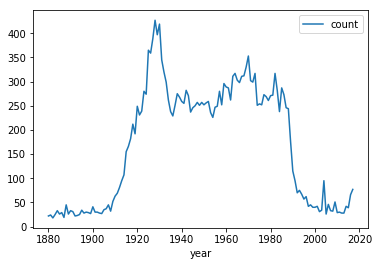

In [5]:
# Visualize my friend's name
def show_names(df, name, sex='F', plot=False):
    try:
        n = df.loc[sex].loc[name]
        if plot == True:
            n.plot(x='year', y='count')
            plt.show()

    except KeyError:
        print("Oops: this name '{}' for sex '{}' is not found".format(name, sex))

df1 = df.set_index(['sex', 'name'])
show_names(df=df1, name='James', sex='F', plot=True)    


In [6]:
def add_rank(group):
    group['rank'] = group['count'].rank(ascending=False)
    return group
df = df.groupby(['sex', 'year']).apply(add_rank)
df.head()

,name,sex,count,year,prop,rank
0,Mary,F,7065,1880,0.077643,1.0
1,Anna,F,2604,1880,0.028618,2.0
2,Emma,F,2003,1880,0.022013,3.0
3,Elizabeth,F,1939,1880,0.021309,4.0
4,Minnie,F,1746,1880,0.019188,5.0


In [7]:
def show_rank(df, name, sex='F', year=2000):
    try:
        rank_df = df[df.year == year][df.sex == sex].drop(columns=['sex', 'year']).set_index('name')
        print("Name {}'s' rank of birhts is {}".format(name, int(rank_df.loc[name][0])))
    except:
        print("Oops: this name '{}' in year '{}' is not found".format(name, year))

show_rank(df=df, name='Allen', sex='M', year=2017)

Name Allen's' rank of birhts is 787


In [8]:
# To estimate the probable margin percentage 
def margin_estimation(df, name, year):
    df1 = df.set_index('year').loc[[year, year+1]].reset_index()
    total_names = df1.name.drop_duplicates().sort_values()
    total_names = total_names.reset_index().drop(columns='index')
    r = total_names[total_names.name == name].index.values[0]
    mpe = round(r/len(total_names)*100, 2)
    print(f'The worst margin percentage estimation is {mpe}% for {name} in {year}')
margin_estimation(df=df, name='Allen', year=2011)

The worst margin percentage estimation is 5.27% for Allen in 2011


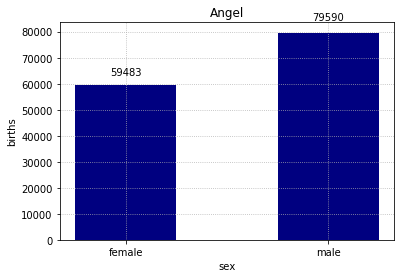

In [9]:
# Show your boy's name that how many girls use as well
def check_gender(df, name, year, plot=False):
    df1 = df.set_index('year')
    df1 = df1.loc[year].pivot_table(
        values='count', index='name', columns='sex', aggfunc='sum', dropna=False).fillna(value=0)
    if plot == True:
        def autolabel(rects):
            """
            Attach a text label above each bar displaying its height
            Refer to: https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
            """
            for rect in rects:
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                        '%d' % int(height),
                        ha='center', va='bottom')
            pass

        x = list(df1.columns.values)
        y = list(df1.loc[name].values)
        fig, ax = plt.subplots() 
        width, ind = .5, np.arange(len(y)) # the width of the bars 
        ax.set_xticks(ind)
        ax.set_xticklabels(('female', 'male'))
        plt.title(name)
        plt.xlabel('sex')
        plt.ylabel('births')
        rects1 = ax.bar(ind, y, width, color='navy')
        autolabel(rects1)
        plt.grid(True, which='major', linestyle=':')
        plt.show()
    pass

year = list(range(1880, 2000))
check_gender(df=df, name='Angel', year=year, plot=True)

In [10]:
# To rank names and show top N names at a certain year
def get_top_nums(group, nums=10):
    return group.sort_values(by='prop', ascending=False)[:nums]

top_names = df.groupby(['year', 'sex']).apply(get_top_nums)
# top_names

def give_top_names(year=1880, sex='F'):
    return top_names[top_names['year'] == year][top_names['sex'] == sex].name.values

# We can simply check ten names in certain year by typing:
print('Top 10 {} names in 2000 are {}'.format('F', give_top_names(year=2000, sex='F')))

Top 10 F names in 2000 are ['Emily' 'Hannah' 'Madison' 'Ashley' 'Sarah' 'Alexis' 'Samantha' 'Jessica'
 'Elizabeth' 'Taylor']


In [11]:
#TODO: know how many names appeared from 1880 to 2017.
m_names = df[df['sex'] == 'M']['name'].drop_duplicates()
f_names = df[df['sex'] == 'F']['name'].drop_duplicates()
m_names.head() #m_names will show you a set of boys names over 137 years.
# print(f'{m_names} male names appeared during 1880 to 2017')
# print(f'{f_names} female names appeared during 1880 to 2017')

942       John
943    William
944      James
945    Charles
946     George
Name: name, dtype: object

In [12]:
_1880_m_names = df[df['sex'] == 'M'][df['year'] == 1880]['name']
_1880_f_names = df[df['sex'] == 'F'][df['year'] == 1880]['name']
_2017_m_names = df[df['sex'] == 'M'][df['year'] == 2017]['name']
_2017_f_names = df[df['sex'] == 'F'][df['year'] == 2017]['name']
print('{} male names in 1880, {} male names increased in 2017'.format(len(_1880_m_names), len(_2017_m_names)))
print('{} female names in 1880, {} female names increased in 2017'.format(len(_1880_f_names), len(_2017_f_names)))

1058 male names in 1880, 14160 male names increased in 2017
942 female names in 1880, 18309 female names increased in 2017


In [13]:
# to find names disappeared 
buffer = []
for n in _1880_m_names.values:
    if n not in _2017_m_names.values:
        buffer.append(n)
# print('These names {} are gone.'.format(buffer))